# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/mammogram.csv')
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [8]:
print(pd.crosstab(df['treatment'], df['breast_cancer_death']))
print(pd.crosstab(df['treatment'], df['breast_cancer_death'], normalize=True))

treatmenteffect = 44425/44925 - 44405/44910
print(treatmenteffect)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
breast_cancer_death        no       yes
treatment                              
control              0.494295  0.005621
mammogram            0.494518  0.005566
0.00011505110015985753


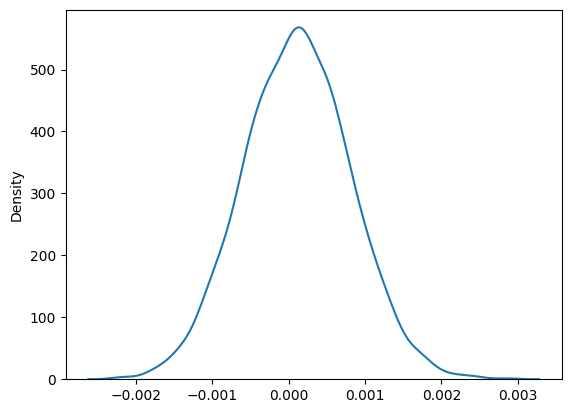

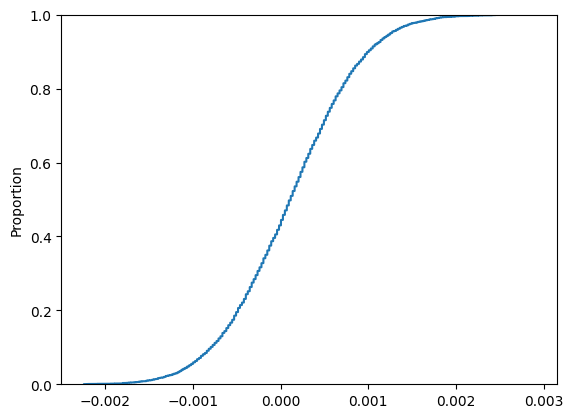

In [9]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()


In [12]:
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)
print(lower_bound,',', upper_bound)

-0.0016661622261402382 , 0.0019852355425004076


In [ ]:
# Because the 99% confidence interval includes 0, this suggests that getting
# a mammogram does not statistically significantly affect survival rates.
# However, mammograms are likely still an important factor in understanding cancer,
# so it might be important to include additional data, such as risk factors or other
# factors that may influence someone to get a mammogram, in order to understand this
# data. It may be that women who already have a concern are more likely to go get
# a mammogram, skewing the data towards those who do have cancer.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

In [14]:
df = pd.read_csv('/content/heart_hw.csv')
df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [16]:
df['treat'] = 0
df['intercept'] = 1
df.loc[ df['transplant'] == 'treatment', 'treat'] = 1
df.head()

,Unnamed: 0,age,transplant,y,treat,intercept
0,1,53,control,0,0,1
1,2,43,control,0,0,1
2,3,52,control,0,0,1
3,4,52,control,0,0,1
4,5,54,control,0,0,1


In [20]:
print( pd.crosstab( df['transplant'], df['y']), '\n')
print("proportion survived, control: ", 4/34)
print('treatment effect: ', 24/(24+45)-4/(30+4))

y            0   1
transplant        
control     30   4
treatment   45  24 

proportion survived, control:  0.11764705882352941
treatment effect:  0.23017902813299232


In [24]:
from sklearn.linear_model import LinearRegression

y=df['y']
X = df.loc[:, ['intercept', 'treat']]
reg = LinearRegression(fit_intercept=False).fit(X, y)
print(reg.coef_)
print(reg.intercept_)
# Regression constant corresponds to the average outcome of the control group
# Slope corresponds to average treatment effect

[0.11764706 0.23017903]
0.0


In [25]:
X = df.loc[:,['intercept', 'treat', 'age'] ]

reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)
# Controlling for age helps control for the fact that elderly people are already
# less healthy and therefore may be less likely to survive a transplant.
# Controlling for age means that the treatment effect increases and the slope for
# age decreases.

Regression Coefficients:  [ 0.70195697  0.26470169 -0.01360722]


<Axes: xlabel='age'>

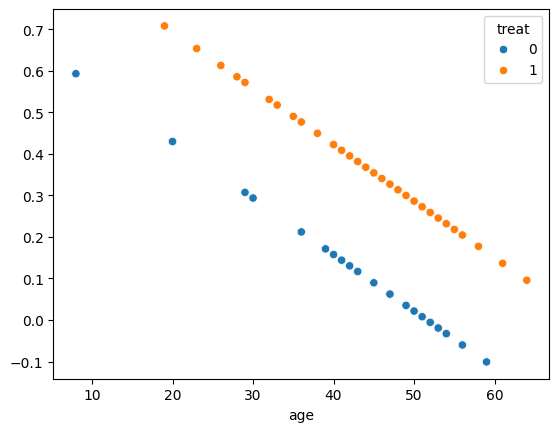

In [26]:

y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

Regression Coefficients:  [-8.54714047e-01  5.86191756e-01  1.02563021e-01 -7.70114914e-03
 -2.70227509e-03  2.01932637e-05]


<Axes: xlabel='age'>

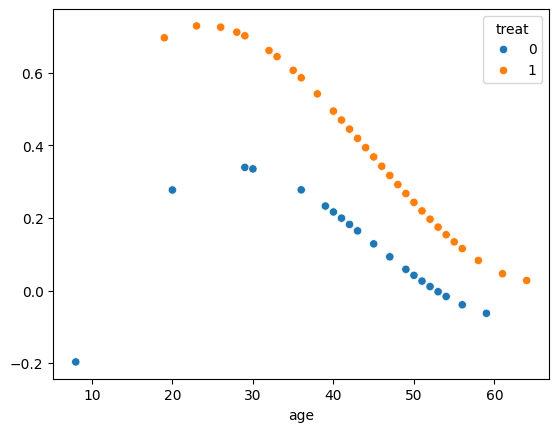

In [27]:
df['treatXage'] = df['treat']*df['age']
df['age_sq'] = df['age']**2
df['treatXage_sq'] = df['treat']*df['age_sq']
df['age_cu'] = df['age']**3
df['treatXage_cu'] = df['treat']*df['age_cu']

y = df['y']
X = df.loc[:,['intercept', 'treat', 'age',
              'treatXage',
              'age_sq', 'age_cu'] ]
reg = LinearRegression(fit_intercept=False).fit(X,y)
print('Regression Coefficients: ', reg.coef_)
y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

###### This graph demonstrates that the highest likelihood of survival occurs between 25 and 30, then decreases nearly steadily after that. The concern of using this model, however, is that there are other circumstances that might indicate a patient's level of need for a transplant, which may also influence their survival. For example, transplant may only be attempted in elderly patients if their condition is dire, and therefore may have a higher fatality rate due to the underlying condition. There may also be other treatment options for younger patients.